In [7]:
import torch
from transformers import AutoModel, AutoTokenizer,AutoProcessor,set_seed

set_seed(42)
# torch.manual_seed(0)
# model_path = "/home/workspace/model/MiniCPM-V-1B-sft-v2-1B"
# model_path = "/home/workspace/model/minicpm-vit-1b-w8-lenovo-llama-w8-pergroup128"
# model_path = "/home/workspace/model/minicpm-vit-1b-w8-lenovo"
model_path = "/home/workspace/model/minicpm-v-25-lenovo"
model = AutoModel.from_pretrained(model_path, 
                                  trust_remote_code=True,
                                  attn_implementation='sdpa', 
                                  torch_dtype=torch.float16,        
                                  device_map=None) 
model_weight_path = "/home/workspace/model/minicpm_v_navit_250_0927.pt"
model.load_state_dict(torch.load(model_weight_path))
model = model.cuda().eval()
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

/tmp/ipykernel_42675/3384911348.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weight_path))
Special tokens have been added in t

In [1]:
from vlmeval.api import OpenAIWrapper
model = OpenAIWrapper('gpt-4-1106-preview', verbose=True)
msgs = [dict(type='text', value='Hello!')]
code, answer, resp = model.generate_inner(msgs)
print(code, answer, resp)

/opt/conda/envs/lmquant/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-23 06:19:55,049 - ChatAPI - INFO - Environment variable OPENAI_API_BASE is set. Will use it as api_base. 
2024-10-23 06:19:55,051 - ChatAPI - INFO - Using API Base: http://15.204.101.64:4000/v1/chat/completions; API Key: sk-5DjKHIAjndzkjCtb85D57d2c3e13403e95B5D2F02c61561b


ConnectTimeout: HTTPSConnectionPool(host='openaipublic.blob.core.windows.net', port=443): Max retries exceeded with url: /encodings/cl100k_base.tiktoken (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7fb84b43c450>, 'Connection to openaipublic.blob.core.windows.net timed out. (connect timeout=None)'))

In [ ]:
from PIL import Image
import os
# image = Image.open('/home/workspace/code/llm-awq/awq/airplane.jpeg').convert('RGB')
for file_name in os.listdir("/home/workspace/dataset/demo_samples"):
    image_file = os.path.join("/home/workspace/dataset/demo_samples", file_name)
    image = Image.open(image_file).convert('RGB')

    # First round chat 
    question = "Please analyze the image in detail base on the following requirements:\n1. Give a brief overview.\n2. Introduce all visible elements in the image. Including axis, numerical value and all text.\n3. Do not estimate values not written on the image. Use markdown format only on tables. Do not output x-axis and y-axis if there is no coordinate axis.\n"

    msgs = [{'role': 'user', 'content': question}]
    answer = model.chat(
        image=image,
        msgs=msgs,
        tokenizer=tokenizer,
        sampling=True,
        temperature=0.3,
        repetition_penalty=1.1,
        top_k=20,
        filename = str(file_name)
    )
    print(answer)
    # break

In [2]:
from PIL import Image
import os
# image = Image.open('/home/workspace/code/llm-awq/awq/airplane.jpeg').convert('RGB')
for file_name in os.listdir("/home/workspace/dataset/lenovo_pince"):
    image_file = os.path.join("/home/workspace/dataset/lenovo_pince", file_name)
    image = Image.open(image_file).convert('RGB')
    # First round chat 
    question = "Please analyze the image in detail base on the following requirements:\n1. Give a brief overview.\n2. Introduce all visible elements in the image. Including axis, numerical value and all text.\n3. Do not estimate values not written on the image. Use markdown format only on tables. Do not output x-axis and y-axis if there is no coordinate axis.\n"

    msgs = [{'role': 'user', 'content': question}]
    answer = model.chat(
        image=image,
        msgs=msgs,
        tokenizer=tokenizer,
        sampling=True,
        temperature=0.3,
        repetition_penalty=1.1,
        top_k=20
    )
    output_dir = "/home/workspace/dataset/lenovo_result_pince"
        # 保存文件名与路径
    save_file_name = f"{os.path.splitext(file_name)[0]}.txt"  # 去掉文件扩展名并添加 .txt
    save_path = os.path.join(output_dir, save_file_name)
    
    # 保存答案到 .txt 文件
    with open(save_path, "w") as file:
        file.write(answer)

    print(f"Saved answer to {save_path}")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/179.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/218.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/189.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/122.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/150.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/180.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/96.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/80.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/128.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/182.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/39.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/132.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/100.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/212.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/149.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/124.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/34.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/162.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/15.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/185.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/97.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/114.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/65.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/129.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/81.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/123.txt


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'top_p': 0.8, 'top_k': 20, 'temperature': 0.3, 'do_sample': True, 'repetition_penalty': 1.1}
Saved answer to /home/workspace/dataset/lenovo_result_pince/194.txt


In [8]:
from PIL import Image
# image = Image.open('/home/workspace/code/llm-awq/awq/airplane.jpeg').convert('RGB')
image = Image.open('/home/workspace/code/I-ViT/0.jpg').convert('RGB')

# First round chat 
question = "Please analyze the image in detail base on the following requirements:\n1. Give a brief overview.\n2. Introduce all visible elements in the image. Including axis, numerical value and all text.\n3. Do not estimate values not written on the image. Use markdown format only on tables. Do not output x-axis and y-axis if there is no coordinate axis.\n"

msgs = [{'role': 'user', 'content': question}]
answer = model.chat(
    image=image,
    msgs=msgs,
    tokenizer=tokenizer,
    sampling=True,
    temperature=0.3,
    repetition_penalty=1.1,
    top_k=20
)
print(answer)

# Second round chat 
# pass history context of multi-turn conversation
# msgs.append({"role": "assistant", "content": [answer]})
# msgs.append({"role": "user", "content": ["Introduce something about Airbus A380."]})

# answer = model_fp.chat(
#     image=None,
#     msgs=msgs,
#     tokenizer=tokenizer
# )
# print(answer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[Title]
Model 1 (current)

[Footer]
Lenovo 2023 Lenovo Internal. All rights reserved.

[Overview]
The image illustrates the current model of a product delivery process involving Lenovo and its customer, highlighting various stages such as sales list entry, governance compliance, security review, and service delivery. It also points out disadvantages like slow progress into the market and high costs for each version.

[Section 1]
Detail in section 1:

**Product Entry:**
- **Description:** The first step where the product enters the sales list.
- **Importance:** This is crucial because it initiates the entire sales process and ensures that the product is available for potential buyers.

**Governance, Compliance, Privacy Protection, Risk Management, Certificate:**
- **Description:** These are critical steps ensuring adherence to regulatory standards and protocols.
- **Importance:** They ensure legal compliance, protect user privacy, manage risks effectively, and provide necessary certific

In [2]:
import torch
from transformers import AutoModel, AutoTokenizer,AutoProcessor
from transformers import set_seed
set_seed(42)
model_path = "/home/workspace/model/minicpm-vit-1b"
model_fp = AutoModel.from_pretrained(model_path,         
        trust_remote_code=True,
        torch_dtype=torch.float16,
        device_map=None,
        attn_implementation="sdpa") # sdpa or flash_attention_2, no eager
model_fp = model_fp.cuda().eval()
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
from PIL import Image
image = Image.open('/home/workspace/code/I-ViT/1.jpg').convert('RGB')

# First round chat 
question = "Please analyze the image in detail base on the following requirements:\n1. Give a brief overview.\n2. Introduce all visible elements in the image. Including axis, numerical value and all text.\n3. Do not estimate values not written on the image. Use markdown format only on tables. Do not output x-axis and y-axis if there is no coordinate axis.\n"

# msgs = [{'role': 'user', 'content': [image, question]}]
# answer = model_fp.chat(
#     image=None,
#     msgs=msgs,
#     tokenizer=tokenizer,
#     sampling=True,
#     temperature=0.3,
#     repetition_penalty=1.1,
#     top_k=20
# )

msgs = [{'role': 'user', 'content': question}]
answer = model_fp.chat(
    image=image,
    msgs=msgs,
    tokenizer=tokenizer,
    sampling=True,
    temperature=0.3,
    repetition_penalty=1.1,
    top_k=20
)
print(answer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[Title]
“Top-down” Compliance Mechanism

[Header]
Data Security and Privacy Protection Working Committee (China-site)

[Footer]
Lenovo 2022 Lenovo Internal. All rights reserved.

[Overview]
The image depicts a hierarchical structure of the Data Security and Privacy Protection Working Committee, detailing various departments within Lenovo China, their respective functions, and the specific roles assigned to each department for compliance purposes.

[Section 1]
Detail in section 1:

**China Geo**
- **China Commercial**
- **SMEs**
- **China Consumer**
- **China Services**
- **China Ops**
- **Global Account Operations**
- **ISG (China)**

**BU**
- **IDG**
- **GSL**
- **PSO**
- **Smart Device / Commercial Product Solutions**
- **SMB**

**Functional Departments**
- **GR**
- **HR**
- **Finance**
- **Marketing**
- **Legal**
- **ICAC**
- **IT**
- **DT**
- **IT Cyber-Security**

**GSC**
- **LFC**

**Lenovo Research**


In [16]:
model_fp.llm.lm_head.weight-model.llm.lm_head.weight

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.float16,
       grad_fn=<SubBackward0>)

In [17]:
model_fp.llm.model.layers[24].self_attn.q_proj.weight-model.llm.model.layers[24].self_attn.q_proj.weight

tensor([[-1.6403e-04, -6.1035e-05,  4.5776e-05,  ...,  4.5776e-05,
         -4.5776e-05,  1.6785e-04],
        [ 1.6022e-04, -7.2479e-05,  7.6294e-06,  ...,  1.8311e-04,
         -4.9591e-05, -1.0681e-04],
        [ 6.8665e-05, -4.5776e-05, -1.6785e-04,  ...,  4.3392e-05,
         -6.1035e-05, -6.1035e-05],
        ...,
        [ 2.7084e-04,  6.8665e-05,  7.6294e-05,  ..., -2.0599e-04,
          4.5776e-05,  2.2888e-05],
        [ 6.8665e-05, -9.1553e-05, -1.6260e-04,  ...,  7.6294e-06,
         -2.4414e-04, -9.1553e-05],
        [ 1.5259e-04,  2.8992e-04, -3.3569e-04,  ..., -1.2207e-04,
          3.0518e-05,  6.1035e-05]], device='cuda:0', dtype=torch.float16,
       grad_fn=<SubBackward0>)

In [18]:
model_fp.llm.model.layers[0].self_attn.q_proj.weight-model.llm.model.layers[0].self_attn.q_proj.weight

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.float16,
       grad_fn=<SubBackward0>)

In [19]:
model_fp.vpm.encoder.layers[0].mlp.fc1.weight-model.vpm.encoder.layers[0].mlp.fc1.weight

tensor([[ 1.0986e-03,  1.8311e-04, -1.2970e-04,  ..., -3.0518e-05,
         -2.7466e-04,  1.3733e-04],
        [-6.4087e-04, -1.0300e-04, -6.4087e-04,  ..., -1.5259e-04,
          1.3161e-04, -1.5259e-04],
        [ 5.6458e-04,  8.2779e-04,  9.1553e-04,  ..., -1.9836e-04,
          1.9073e-04,  3.0518e-04],
        ...,
        [-8.0872e-04,  0.0000e+00,  7.0190e-04,  ..., -8.7619e-06,
         -2.1362e-04, -3.2043e-04],
        [-3.4332e-04,  6.3658e-04, -3.0518e-05,  ...,  4.8065e-04,
         -1.2207e-04,  5.3406e-05],
        [ 5.7983e-04,  4.5776e-05,  6.7139e-04,  ...,  2.2316e-04,
         -3.1662e-04, -2.4414e-04]], device='cuda:0', dtype=torch.float16,
       grad_fn=<SubBackward0>)

In [28]:
from PIL import Image
image = Image.open('/home/workspace/code/llm-awq/awq/airplane.jpeg').convert('RGB')

# First round chat 
question = "Tell me the model of this aircraft."
msgs = [{'role': 'user', 'content': [image, question]}]

answer = model.chat(
    image=None,
    msgs=msgs,
    tokenizer=tokenizer
)
print(answer)

# Second round chat 
# pass history context of multi-turn conversation
# msgs.append({"role": "assistant", "content": [answer]})
# msgs.append({"role": "user", "content": ["Introduce something about Airbus A380."]})

# answer = model_fp.chat(
#     image=None,
#     msgs=msgs,
#     tokenizer=tokenizer
# )
# print(answer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


input_ids
attention_mask
pixel_values
image_sizes
image_bound
tgt_sizes
The aircraft in the image is a Boeing 747, specifically one of its variants known as an "A300." The model number 'B-6125' indicates that this particular airplane belongs to the B-series fleet which includes various models and configurations based on their design features such as engines, size, and passenger capacity. To determine the exact variant (such as A300 or other), more information would be needed about specific characteristics like wing configuration, cabin layout, etc.


In [76]:
from datasets import load_from_disk
dataset = load_from_disk("/home/workspace/dataset/MME")["test"]
processor = AutoProcessor.from_pretrained("/home/workspace/model/MiniCPM-V-1B-sft-v2-1B", trust_remote_code=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [82]:
prompts_lists = []
input_images_lists = []
for index, _data in enumerate(dataset):
    promt = _data["question"]
    image = _data["image"]
    msgs = [{'role': 'user', 'content': "(<image>./</image>)\n"+ promt}]
    prompts_lists.append(processor.tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=True))
    input_images_lists.append([image])
    if index >= 2:
        break

In [83]:
inputs = processor(
    prompts_lists,
    input_images_lists,
    max_slice_nums=9,
    use_image_id=True,
    return_tensors="pt",
    max_length=8192
).to("cuda")

In [87]:
inputs["input_ids"].shape

torch.Size([3, 100])

In [10]:
model(inputs)["logits"].shape

torch.Size([2, 94, 73454])

In [11]:
model_inputs = {
    "input_ids": input_ids,
    "image_bound": image_bound,
}

if vision_hidden_states is None:
    model_inputs["pixel_values"] = pixel_values
    model_inputs['tgt_sizes'] = tgt_sizes
else:
    model_inputs["vision_hidden_states"] = vision_hidden_states

NameError: name 'input_ids' is not defined

In [ ]:
from datasets import load_dataset
load_dataset("wikitext", "wikitext-2-raw-v1", split="test")

Using the latest cached version of the dataset since wikitext couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'wikitext-2-raw-v1' at /root/.cache/huggingface/datasets/wikitext/wikitext-2-raw-v1/0.0.0/b08601e04326c79dfdd32d625aee71d232d685c3 (last modified on Sat Sep 14 07:29:56 2024).


Dataset({
    features: ['text'],
    num_rows: 4358
})

In [6]:
from datasets import load_dataset,load_from_disk
dataset = load_from_disk("/home/workspace/dataset/MME")["test"]


In [9]:
for index, _data in enumerate(dataset):
    a = _data["image"]
    break

In [20]:
def load_lenovo(root_folder):
    import os
    import json
    from PIL import Image
    import re

    result_list = []
    image_tag_pattern = r"\u003Cimage\u003E.*?\u003C\/image\u003E"

    for folder_name in os.listdir(root_folder):
        sub_folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(sub_folder_path):
            json_file = None
            image_file = None
            for file_name in os.listdir(sub_folder_path):
                if file_name.endswith(".json"):
                    json_file = os.path.join(sub_folder_path, file_name)
                elif file_name.endswith(".png"):
                    image_file = os.path.join(sub_folder_path, file_name)
            
            if json_file and image_file:
                with open(json_file, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                
                task_description = None
                for item in data:
                    if item.get('from') == 'human':
                        task_description = item.get('value')
                        
                        # 去除以 <image> 开头的部分
                        task_description = re.sub(image_tag_pattern, "", task_description)
                        break
                
                image = Image.open(image_file)

                if task_description:
                    result_list.append({
                        "question": task_description,
                        "image": image
                    })

    return result_list



## Task Overview
You are an expert in interpreting complex PowerPoint slides. Please thoroughly analyze the provided slide screenshot by following these steps:
## Task Instructions
Identify and extract the title, slide header, slide footer, and page number from the slide.
Provide a concise summary of the content displayed in the slide screenshot.
Apart from the title and footer, identify all charts in the screenshot. For each chart, specify its type, position on the slide, and provide a brief introduction.
Conduct a detailed analysis of each section in the slide, offering a comprehensive description of all visible elements.


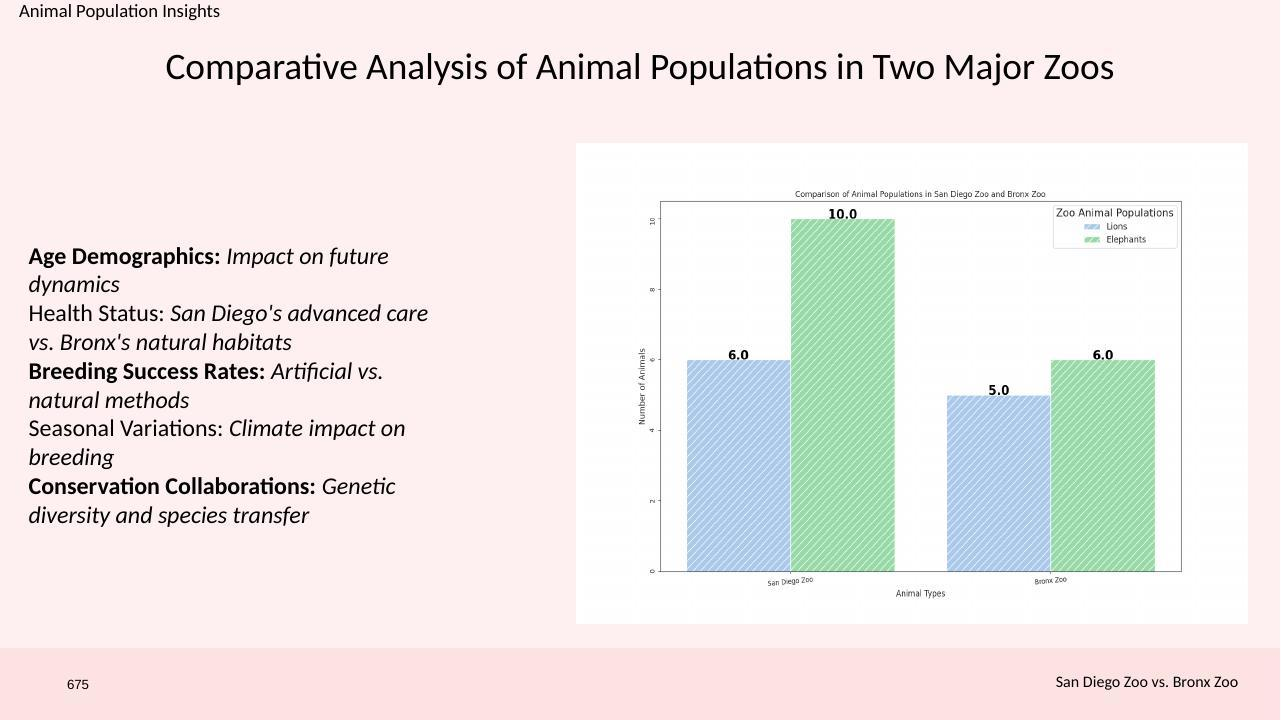

In [14]:
# 使用示例
root_folder = "/home/workspace/dataset/lenovo"  # 替换为实际的文件夹路径
data_list = load_lenovo(root_folder)

# 输出结果
for data in data_list:
    print(data["task_description"])
    data["image"].show()  # 显示图片
    break

In [25]:
from transformers import AutoModel, AutoTokenizer,AutoProcessor
import random

dataset = load_lenovo("/home/workspace/dataset/lenovo" )
processor = AutoProcessor.from_pretrained("/home/workspace/model/MiniCPM-V-1B-sft-v2-1B", trust_remote_code=True)
rng = random.Random(42)
samples, num_tokens = [], 0
prompts_lists = []
input_images_lists = []
for index, _data in enumerate(dataset):
    promt = _data["question"]
    image = _data["image"]
    msgs = [{'role': 'user', 'content': "(<image>./</image>)\n"+ promt}]
    prompts_lists.append(processor.tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=True))
    input_images_lists.append([image])
    if index >= 0:
        break
    
inputs = processor(
    prompts_lists,
    input_images_lists,
    max_slice_nums=9,
    use_image_id=True,
    return_tensors="pt",
    max_length=8192
)
sample = inputs

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [26]:
sample["input_ids"].shape

torch.Size([1, 824])